# Featurizing text data with tfidf weighted word-vectors

In [6]:
import pandas as pd
import mlxtend
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm')
df_final= pd.read_csv("/floyd/input/quora/df_final.csv", encoding="ISO-8859–1")
#questions=pd.read_csv("/floyd/input/quora/df.questions.csv")

#df=pd.read_csv("/floyd/input/quora/sample.csv")
questions = list(df_final['question1']) + list(df_final['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
df=df_final



In [1]:
#!pip install spacy && python -m spacy download en_core_web_sm
#!pip install mlxtend



In [7]:

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 384])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

100%|██████████| 100000/100000 [30:47<00:00, 54.13it/s]


In [8]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 384])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 100000/100000 [30:49<00:00, 54.07it/s]


In [15]:
df_final.columns
df1=df_final.drop(['qid1','qid2','question1','question2', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1_plus_freq_q2', 'freq_q1_minus_freq_q2','q1_feats_m','q2_feats_m','Unnamed: 0'],axis=1)

In [17]:
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,token_set_ratio
0,30593,0,0.666644,0.399992,0.999967,0.999967,0.833319,0.624992,1,1,2,7.0,85,82,81,85
1,14588,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,4,8.0,54,41,51,54
2,84732,0,0.399992,0.399992,0.285710,0.222220,0.333331,0.285712,0,1,2,13.0,62,56,56,67
3,76681,1,0.599988,0.428565,0.000000,0.000000,0.374995,0.199999,1,0,7,11.5,57,57,63,68
4,33337,0,0.571420,0.444440,0.799984,0.666656,0.615380,0.571424,1,1,1,13.5,62,70,61,73


In [22]:
df2=df_final.drop(['qid1','qid2','question1','question2','is_duplicate', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio','q1_feats_m','q2_feats_m','Unnamed: 0'],axis=1)

In [12]:
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [23]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1_plus_freq_q2,freq_q1_minus_freq_q2
0,30593,1,1,37,38,6,6,5,12,0.416667,2,0
1,14588,1,1,57,37,10,6,10,16,0.625000,2,0
2,84732,1,1,64,63,12,13,3,24,0.125000,2,0
3,76681,4,3,88,51,15,8,3,21,0.142857,7,1
4,33337,1,1,85,71,14,13,8,27,0.296296,2,0


In [24]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-13.121608,17.947282,-24.313737,-5.792233,0.459872,5.763047,-108.877964,-36.541043,62.526138,16.526539,...,7.079321,11.753101,1.477326,-9.993146,19.744911,2.220095,-2.702868,-6.831515,-0.081455,4.647429
1,4.145867,22.226776,40.776319,118.257437,-21.401488,57.066576,-123.610926,-5.755137,111.862842,-8.387325,...,16.810243,35.264935,4.348551,-10.066552,18.069984,6.460742,-7.740140,6.421093,10.741036,11.015389
2,70.153075,31.325463,62.259861,103.441883,26.411019,48.800820,-51.149867,-39.741656,68.867702,-2.942403,...,18.403719,13.222517,3.144601,-12.276493,-0.686245,4.184393,-2.295204,8.192931,16.150934,2.268642
3,33.156885,24.940371,6.149442,21.724185,65.167311,6.545468,-174.414898,-17.667361,67.376070,-5.279292,...,20.549877,29.425658,4.312730,-3.535848,23.436607,1.731649,-3.919327,-15.107177,21.988952,1.684511
4,7.805394,34.667365,61.572840,4.119829,42.458673,-18.720954,-241.019311,-14.754790,86.189381,10.568497,...,1.539311,45.839836,4.509744,-19.797722,-0.135001,-5.445467,-24.534519,7.535734,8.184184,5.593980


In [25]:
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,18.536550,5.016016,38.002597,22.643192,-7.833076,-65.580414,-88.623813,-13.815491,39.869797,-16.523647,...,8.924126,17.007312,-0.644164,-7.311227,13.211235,3.669170,-2.566473,5.166403,-10.473049,8.007007
1,-2.313646,-26.279892,14.545832,6.623410,-35.416654,72.467011,-166.687179,46.668171,25.191790,39.667314,...,6.776586,-5.770246,-2.519720,-7.451153,11.823058,-2.004648,-13.762161,7.098861,21.729369,-5.752992
2,10.680265,14.620452,66.379286,43.620483,25.591813,-16.833529,-43.182407,53.216624,24.236194,-3.009481,...,15.216580,6.547918,-6.401585,-1.038427,8.172690,16.067287,-9.158332,10.493886,15.650029,-2.580351
3,11.717313,65.080546,4.079166,75.279396,17.656903,33.985531,-129.222585,-23.997127,51.818187,-13.838333,...,19.794890,13.751645,4.266829,-2.694284,9.697474,-3.594147,2.090878,-9.539709,3.519324,-0.460883
4,50.489943,15.220360,44.268099,71.277060,-50.499872,-8.706159,-147.545807,8.291475,55.067743,20.159277,...,3.107597,22.771668,5.529652,-12.904547,7.808178,12.185966,-12.221444,-0.361167,8.969588,0.135575


In [26]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 16
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 384
Number of features in question2 w2v  dataframe : 384
Number of features in final dataframe  : 796


In [27]:
df3_q1['id']=df1['id']
df3_q2['id']=df1['id']
df1  = df1.merge(df2, on='id',how='left')
df2  = df3_q1.merge(df3_q2, on='id',how='left')
result  = df1.merge(df2, on='id',how='left')
   # result.to_csv('final_features.csv')

# Machine Learning Models

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3

import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [29]:
result.columns
id_rel=result["id"]
is_dup=result["is_duplicate"]

In [30]:
result=result.drop(['id','is_duplicate'],axis=1)

In [31]:
data=result

# Converting strings to numerics

In [32]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
token_set_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1_plus_freq_q2
freq_q1_minus_freq_q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [33]:
y_true = list(map(int, is_dup.values))

# Random train test split( 70:30)

In [34]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [35]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 793)
Number of data points in test data : (30000, 793)


In [37]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6274571428571428 Class 1:  0.3725428571428571
---------- Distribution of output variable in test data ----------
Class 0:  0.3725333333333333 Class 1:  0.3725333333333333


# Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.8845208556566297


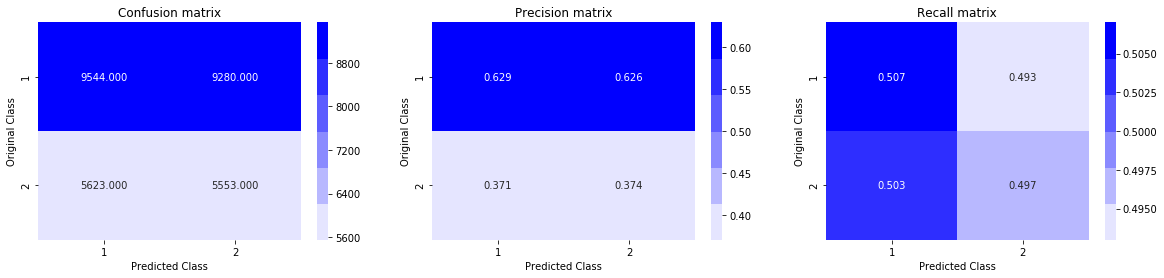

In [40]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [39]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    B =(C/C.sum(axis=0))
 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# XGBoost

In [41]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[16:05:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-logloss:0.685674	valid-logloss:0.685825
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[16:05:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16:05:48] src/

Total number of data points : 30000


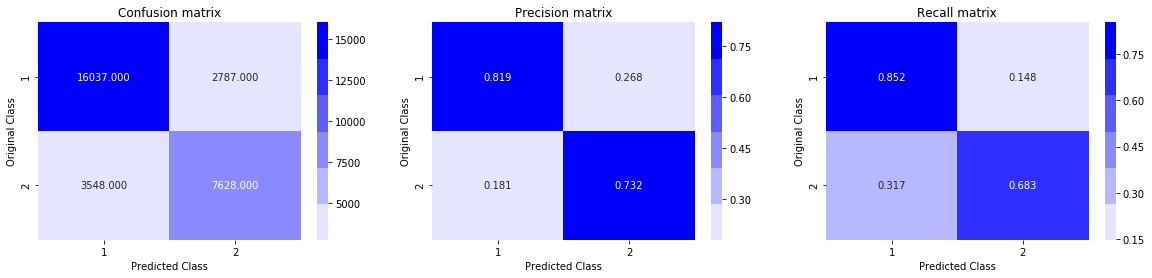

In [42]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)